<a href="https://colab.research.google.com/github/suarez-oa/web_scraping/blob/main/web_sccraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from datetime import date
import csv

In [ ]:
# Se carga la pagina para realizar el scraping

url = 'https://cuspide.com/100-mas-vendidos/'
r = requests.get(url)

if r.status_code == 200:
    # El código 200 indica que la solicitud fue exitosa
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
else:
    print("Error en la solicitud web. Código de estado:", r.status_code)

In [ ]:
# Despues de localizar las etiquetas se procede a extraer los enlaces de cada libro y el nombre

links = soup.find_all('a')
enlaces = []
nombres = []
for link in links:
        href = link.get('href')
        if href and '/producto/' in href:
            enlace = href
            nombre = link.text.strip()
            enlaces.append(enlace)
            nombres.append(nombre)

# Este codigo se hizo porque los enlaces salen repetidos
enlaces_sd = []
for j in enlaces:
    if j not in enlaces_sd:
        enlaces_sd.append(j)

In [ ]:
# Se realiza una limpieza a la lista de nombres
nombres = [elemento.replace(".", "").strip() for elemento in nombres]
nombres = [elemento for elemento in nombres if elemento]


# Se hace el scraping para obtener los precios en pesos argentinos
bdi_elements = soup.find_all('bdi')
precio_pesos = []
# Recorre la lista de elementos y extrae su contenido de texto
for bdi_element in bdi_elements:
    precio = bdi_element.text.strip()
    precio_pesos.append(precio)

# Se realiza una limpieza al precio
precio_pesos = [elemento.replace('$', '').replace('.', '').replace(',', '.').strip() for elemento in precio_pesos]
precio_pesos_array = np.array(precio_pesos, dtype=float)

# Se ellimina el primer valor
precio_pesos_array = np.delete(precio_pesos_array, 0)

In [ ]:
# Se hace el scraping del precio de cada libro en dolares $US

precio_dolares = []  # Aquí almacenaremos los precios en dólares

for url_libro in enlaces_sd:
    try:
        precio_response = requests.get(url_libro)
        if precio_response.status_code == 200:
            html_precio = precio_response.text
            precio_bus = BeautifulSoup(html_precio, features='html.parser')
            precio_libro_usd = precio_bus.find('span', style='font-size: 1.3em')

            if precio_libro_usd:
                precio_dolares.append(precio_libro_usd.text.strip().replace(',','.'))
            else:
                print(f'No se encontró el precio en la página: {url_libro}')
        else:
            print(f'Error en la solicitud de la página: {url_libro}')
    except Exception as e:
        print(f'Error al procesar el enlace {url_libro}: {str(e)}')

No se encontró el precio en la página: https://cuspide.com/producto/lo-mejor-y-lo-peor-de-internet/
No se encontró el precio en la página: https://cuspide.com/producto/como-hacer-que-te-pasen-cosas-buenas/
No se encontró el precio en la página: https://cuspide.com/producto/como-ganar-amigos-e-influir-sobre-las-personas-2/
No se encontró el precio en la página: https://cuspide.com/producto/taylor-from-the-vault/
No se encontró el precio en la página: https://cuspide.com/producto/entender-un-elefante/
No se encontró el precio en la página: https://cuspide.com/producto/generacion-idiota/
No se encontró el precio en la página: https://cuspide.com/producto/habitos-atomicos/
No se encontró el precio en la página: https://cuspide.com/producto/el-poder-del-ahora-2/
No se encontró el precio en la página: https://cuspide.com/producto/las-mujeres-que-aman-demasiado/


In [ ]:
# Hacemos la carga de la pagina donde se extraera el precio del dolar Blue

url = 'https://www.cronista.com/MercadosOnline/dolar.html'
r = requests.get(url)

if r.status_code == 200:
    # El código 200 indica que la solicitud fue exitosa
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    # Resto del código para extraer los nombres de los libros
else:
    print("Error en la solicitud web. Código de estado:", r.status_code)

Dolar Blue: 955.0


In [ ]:
datos = {'titulo': nombres, 'url': enlaces_sd, 'precio': precio_pesos_array, 'precio_usd_blue': precio_dolar_blue}


In [ ]:
df = pd.DataFrame(datos)
#df.head()
df.to_csv('cuspide.csv', index=False, encoding='utf-8')

In [ ]:
df

,titulo,url,precio,precio_usd_blue
0,COMO SALIR DEL POZO,https://cuspide.com/producto/como-salir-del-pozo/,9999.0,10.47
1,LA FELICIDAD,https://cuspide.com/producto/la-felicidad-2/,13900.0,14.55
2,ESTE DOLOR NO ES MIO,https://cuspide.com/producto/este-dolor-no-es-...,13800.0,14.45
3,ZENSORIALMENTE,https://cuspide.com/producto/zensorialmente/,10999.0,11.52
4,DESTROZA ESTE DIARIO ( A TODO COLOR ),https://cuspide.com/producto/destroza-este-dia...,15500.0,16.23
...,...,...,...,...
95,EL PODER DEL AHORA,https://cuspide.com/producto/el-poder-del-ahor...,9499.0,9.95
96,"MUCHAS VIDAS , MUCHOS MAESTROS",https://cuspide.com/producto/muchas-vidas-much...,9499.0,9.95
97,LAS MUJERES QUE AMAN DEMASIADO,https://cuspide.com/producto/las-mujeres-que-a...,8699.0,9.11
98,MEDITACIONES,https://cuspide.com/producto/meditaciones-2/,12870.0,13.48


In [ ]:
# Se carga la pagina para realizar el scraping

url = 'https://cuspide.com/100-mas-vendidos/'
r = requests.get(url)

if r.status_code == 200:
    # El código 200 indica que la solicitud fue exitosa
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
else:
    print("Error en la solicitud web. Código de estado:", r.status_code)

# Despues de localizar las etiquetas se procede a extraer los enlaces de cada libro y el nombre

links = soup.find_all('a')
enlaces = []
nombres = []
for link in links:
        href = link.get('href')
        if href and '/producto/' in href:
            enlace = href
            nombre = link.text.strip()
            enlaces.append(enlace)
            nombres.append(nombre)

# Este codigo se hizo porque los enlaces salen repetidos
enlaces_sd = []
for j in enlaces:
    if j not in enlaces_sd:
        enlaces_sd.append(j)

# Se realiza una limpieza a la lista de nombres
nombres = [elemento.replace(".", "").strip() for elemento in nombres]
nombres = [elemento for elemento in nombres if elemento]


# Se hace el scraping para obtener los precios en pesos argentinos
bdi_elements = soup.find_all('bdi')
precio_pesos = []
# Recorre la lista de elementos y extrae su contenido de texto
for bdi_element in bdi_elements:
    precio = bdi_element.text.strip()
    precio_pesos.append(precio)

# Se realiza una limpieza al precio
precio_pesos = [elemento.replace('$', '').replace('.', '').replace(',', '.').strip() for elemento in precio_pesos]
precio_pesos_array = np.array(precio_pesos, dtype=float)

# Se ellimina el primer valor
precio_pesos_array = np.delete(precio_pesos_array, 0)

# Se hace el scraping del precio de cada libro en dolares $US

precio_dolares = []  # Aquí almacenaremos los precios en dólares

for url_libro in enlaces_sd:
    try:
        precio_response = requests.get(url_libro)
        if precio_response.status_code == 200:
            html_precio = precio_response.text
            precio_bus = BeautifulSoup(html_precio, features='html.parser')
            precio_libro_usd = precio_bus.find('span', style='font-size: 1.3em')

            if precio_libro_usd:
                precio_dolares.append(precio_libro_usd.text.strip().replace(',','.'))
            else:
                print(f'No se encontró el precio en la página: {url_libro}')
        else:
            print(f'Error en la solicitud de la página: {url_libro}')
    except Exception as e:
        print(f'Error al procesar el enlace {url_libro}: {str(e)}')

# Hacemos la carga de la pagina donde se extraera el precio del dolar Blue

url = 'https://www.cronista.com/MercadosOnline/dolar.html'
r = requests.get(url)

if r.status_code == 200:
    # El código 200 indica que la solicitud fue exitosa
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    # Resto del código para extraer los nombres de los libros
else:
    print("Error en la solicitud web. Código de estado:", r.status_code)


datos = {'titulo': nombres, 'url': enlaces_sd, 'precio': precio_pesos_array, 'precio_usd_blue': precio_dolar_blue}
df = pd.DataFrame(datos)
#df.head()
df.to_csv('cuspide3.csv', index=False, encoding='utf-8')


No se encontró el precio en la página: https://cuspide.com/producto/lo-mejor-y-lo-peor-de-internet/
No se encontró el precio en la página: https://cuspide.com/producto/como-hacer-que-te-pasen-cosas-buenas/
No se encontró el precio en la página: https://cuspide.com/producto/como-ganar-amigos-e-influir-sobre-las-personas-2/
No se encontró el precio en la página: https://cuspide.com/producto/taylor-from-the-vault/
No se encontró el precio en la página: https://cuspide.com/producto/entender-un-elefante/
No se encontró el precio en la página: https://cuspide.com/producto/generacion-idiota/
No se encontró el precio en la página: https://cuspide.com/producto/habitos-atomicos/
No se encontró el precio en la página: https://cuspide.com/producto/el-poder-del-ahora-2/
No se encontró el precio en la página: https://cuspide.com/producto/las-mujeres-que-aman-demasiado/


'<!DOCTYPE HTML>\r\n<html lang="es">\r\n<head>\r\n<meta charset="ISO-8859-1"><link rel="icon" type="image/png" href="/files/image/467/467707/62c2501e9cac7-favicon-32x32_32_32!.png?s=6aa31041de3178c3336f772aedfaae76&d=1656901677" sizes="32x32"><link rel="icon" type="image/png" href="/files/image/467/467707/62c2501e9cac7-favicon-16x16_16_16!.png?s=16a6c3ab222eaf453b8b12860a41e084&d=1656901698" sizes="16x16"><link rel="apple-touch-icon" href="/files/image/467/467707/62c2501e9cac7-favicon-512x512_256_256!.png?s=42c5dcfd444ce7eb3984235db1d2bcac&d=1656901678&72136v10"><meta name="apple-mobile-web-app-title" content="ECC"><meta name="apple-mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-status-bar-style" content="black"><meta name="theme-color" content="#3D939B"><link rel="manifest" href="/files/site/manifest.json"><meta name="viewport" content="width=device-width, initial-scale=1.0"/><meta name="Generator" content="Víncolo CMS"><script>var vsm=vsm||{};vsm.cmd=vsm.cmd||
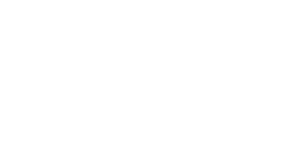
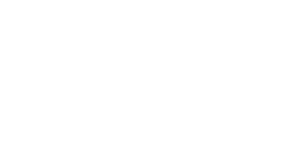
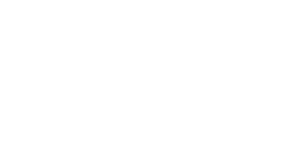
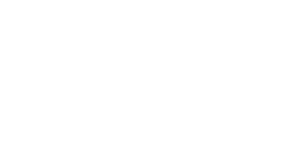
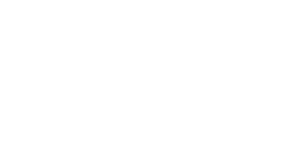
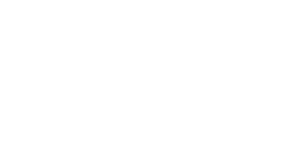
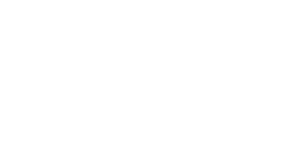
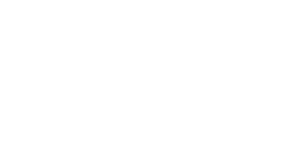
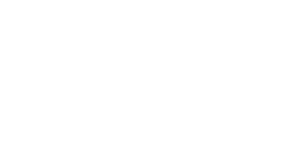
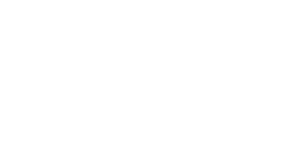
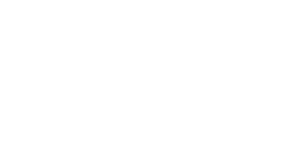
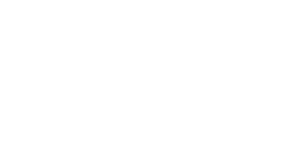
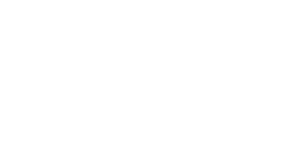
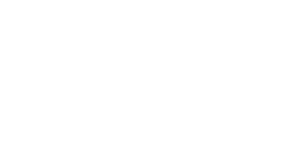
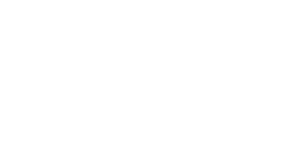
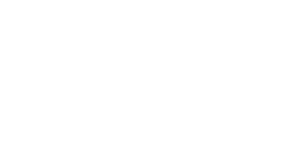
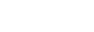
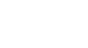
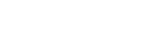

In [ ]:
html_doc

In [ ]:
bdi_elements

[<bdi><span class="woocommerce-Price-currencySymbol">$</span> 0,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 9.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 13.900,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 13.800,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 10.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 15.500,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 14.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 9.499,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 16.400,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 13.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 12.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span> 7.999,00</bdi>,
 <bdi><span class="woocommerce-Price-currencySymbol">$</span

In [ ]:
links

[<a class="skip-link screen-reader-text" href="#main">Saltar al contenido</a>,
 <a href="https://cuspide.com/" rel="home" title="Cúspide - Libros">
 <img alt="Cúspide" class="header_logo header-logo" height="100" src="https://cuspide.com/wp-content/uploads/2022/11/logo-cuspide.jpg" width="285"/><img alt="Cúspide" class="header-logo-dark" height="100" src="https://cuspide.com/wp-content/uploads/2022/11/logo-cuspide.jpg" width="285"/></a>,
 <a aria-controls="main-menu" aria-expanded="false" aria-label="Menú" class="is-small" data-bg="main-menu-overlay" data-color="" data-open="#main-menu" data-pos="left" href="#">
 <i class="icon-menu"></i>
 </a>,
 <a class="nav-top-link nav-top-not-logged-in" href="https://cuspide.com/mi-cuenta/">
 <span>
     Acceder / Registrarme      </span>
 </a>,
 <a class="wishlist-link is-small" href="https://cuspide.com/lista-de-deseos/">
 <span class="hide-for-medium header-wishlist-title">
   	  Lista de deseos  	</span>
 <i class="wishlist-icon icon-heart">
 